In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

sns.set_context('paper')
sns.set_style('white')

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

In [2]:
import platform
if platform.system() == 'Darwin':
    path = '/Users/jenniferwh/Dropbox/DMN data/layers'
    td_dataset = pd.read_csv(r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/target_defined_dataset.csv')
    dat = pd.read_csv(r'/Users/jenniferwh/Dropbox/DMN data/correlations/_final/good_td_wt_correlations_with_inj_corr.csv')
    cdat = pd.read_csv(r'/Users/jenniferwh/Dropbox/DMN data/correlations/_final/good_wt_correlations_with_inj_corr.csv')
elif platform.system() == 'Windows':
    path = r'C:\Users\jenniferwh\Dropbox\DMN data\layers'
    td_dataset = pd.read_csv(r"C:\Users\jenniferwh\Dropbox (Allen Institute)\Mesoscale Connectome Papers in Progress\2019 DMN\target_defined_dataset.csv")
    dat = pd.read_csv(r"C:\Users\jenniferwh\Dropbox (Personal)\DMN data\correlations\_final\good_td_wt_correlations_with_inj_corr.csv")
    cdat = pd.read_csv(r"C:\Users\jenniferwh\Dropbox (Personal)\DMN data\correlations\_final\good_wt_correlations_with_inj_corr.csv")

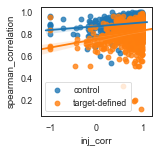

In [3]:
fig, ax = plt.subplots(figsize = (2, 2))
sns.regplot('inj_corr', 'spearman_correlation', data = cdat, label = 'control')
sns.regplot('inj_corr', 'spearman_correlation', data = dat, label = 'target-defined')
plt.legend()

In [4]:
dat = dat.merge(td_dataset[['image_series_id', 'target_by_projection']], on = 'image_series_id',
               how = 'left')

In [5]:
low_corr = dat[dat['inj_corr'] < 0][['image_series_id',
                                              'source', 
                                               'target_by_projection',
                                               'inj_corr', 'sig',
                                              'sig_with_contra',
                                              'sig_ipsi_and_contra']]['image_series_id'].unique()

In [6]:
meandat = pd.read_csv(r'/Users/jenniferwh/Dropbox/DMN data/correlations/_final/td_mean_corr_dat_final.csv')

In [7]:
meandat[meandat['image_series_id'].isin(low_corr)][['image_series_id',
                                              'source', 
                                               'target_by_projection',
                                               'inj_corr', 'sig_ipsi',
                                              'sig_ipsi_and_contra',
                                                   'both_sig']]

,image_series_id,source,target_by_projection,inj_corr,sig_ipsi,sig_ipsi_and_contra,both_sig
9,478995566,CLA,ENTl,0.333333,False,False,False
12,484612961,ECT,PL,-0.219367,False,True,False
14,495346667,VISp,VISl,0.659950,False,False,False
31,521617657,TEa,AUDp,-0.145057,True,False,False
33,521955016,ORBvl,VISam,0.443182,True,False,False
43,526784559,VISp,VISpm,0.769197,False,False,False
54,529428776,TEa,AId,-1.000000,True,True,True
59,532005897,ORBvl,VISam,0.344863,True,True,True
62,539511058,VISp,VISpor,0.600675,False,False,False
63,539514325,VISp,VISp,0.558363,False,False,False


In [8]:
meanc = pd.read_csv(r'/Users/jenniferwh/Dropbox/DMN data/correlations/_final/control_mean_corr_dat_final.csv')

In [9]:
meandat['inj_corr'].min()

-1.0

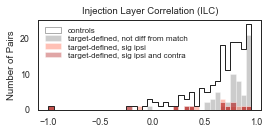

In [10]:
fig, ax = plt.subplots(figsize = (4, 1.65))
bins = np.arange(-1, 1, 0.05)
'''sns.distplot(cmeans['inj_corr'], bins = bins, label = 'controls', kde = False, color='k')'''
sns.distplot(meanc['inj_corr'], bins = bins, kde = False, color='k', label = 'controls',
            hist_kws={"histtype": "step"})
sns.distplot(meandat[(meandat['sig_ipsi'] == False) & 
                 (meandat['sig_ipsi_and_contra'] == False) & 
                 (meandat['both_sig'] == False)]['inj_corr'], 
             bins = bins,
             label = 'target-defined, not diff from match', kde = False, color = 'gray')            
sns.distplot(meandat[meandat['sig_ipsi']]['inj_corr'], 
             bins = bins,
             label = 'target-defined, sig ipsi', kde = False, color = 'tomato')
sns.distplot(meandat[meandat['sig_ipsi_and_contra']]['inj_corr'], 
             bins = bins,
             label = 'target-defined, sig ipsi and contra', kde = False, color = 'firebrick')
sns.distplot(meandat[meandat['sig_ipsi_and_contra']]['inj_corr'], 
             bins = bins,
             kde = False, color = 'firebrick')
sns.distplot(meanc['inj_corr'], bins = bins, kde = False, color='k', 
            hist_kws={"histtype": "step", "alpha": 1})
plt.legend(loc = 2, frameon = False, fontsize = 8, labelspacing=0.2)
plt.title('Injection Layer Correlation (ILC)')
ax.set_ylabel('Number of Pairs')
ax.set_xlabel("")

plt.savefig(os.path.join(path, 'mean inj corr per experiment.pdf'), 
            bbox_inches='tight', pad_inches=0.3, format='pdf', dpi=300)

In [11]:
554421791 in meanc['image_series_id'].unique()

True

In [12]:
meanc.sort_values(by='inj_corr', ascending = False)

,image_series_id,source,injection_size,number_comparisons,spearman_correlation,predicted_spearman,mean_overlap,mean_distance,low_pred,inj_corr,coeff_var,spearman_correlation_with_contra,predicted_spearman_with_contra,low_pred_with_contra,coeff_var_ic,sig,sig_ipsi_and_contra,both_sig,any_sig
182,554421791,AUDpo,0.065066,1,0.925786,0.894676,0.641034,418.210473,0.827797,1.000000,NaN,0.938189,0.853292,0.777471,NaN,False,False,False,False
20,112514915,SSs,0.302667,1,0.933411,0.889145,0.189428,764.525997,0.822224,0.999508,NaN,0.894004,0.850003,0.774134,NaN,False,False,False,False
35,117298988,SSs,0.302667,1,0.933411,0.889145,0.189428,764.525997,0.822224,0.999508,NaN,0.894004,0.850003,0.774134,NaN,False,False,False,False
162,510417993,VISp,0.020779,1,0.901152,0.876526,0.952616,104.880885,0.809533,0.999351,NaN,0.793910,0.833330,0.757380,NaN,False,False,False,False
173,524874308,VISrl,0.200678,1,0.912578,0.910175,0.777258,726.773692,0.843253,0.998872,NaN,0.896519,0.871098,0.795228,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,126907302,SSp-bfd,0.108884,2,0.931711,0.917665,0.915556,458.916871,0.846166,-0.049817,0.013478,0.870959,0.878878,0.797993,0.011086,False,False,False,False
13,100149969,SSp-m,0.197858,3,0.814632,0.899535,0.303670,525.248717,0.818229,-0.053048,0.058501,0.845018,0.861612,0.769977,0.059068,True,False,False,True
216,606929366,VISp,0.106491,1,0.828946,0.910227,0.829025,558.838080,0.843287,-0.170955,NaN,0.862939,0.870342,0.794450,NaN,True,False,False,True
28,113226232,ENTm,0.399350,1,0.663761,0.898726,0.352435,659.772688,0.831787,-0.209089,NaN,0.702998,0.860625,0.784735,NaN,True,True,True,True


In [13]:
meanc['inj_corr'].describe()

count    227.000000
mean       0.750570
std        0.284836
min       -1.000000
25%        0.657332
50%        0.826175
75%        0.958397
max        1.000000
Name: inj_corr, dtype: float64

In [14]:
meandat[(meandat['sig_ipsi'] == False) & 
                 (meandat['sig_ipsi_and_contra'] == False) & 
                 (meandat['both_sig'] == False)]['inj_corr'].describe()

count    109.000000
mean       0.847674
std        0.252833
min       -1.000000
25%        0.798483
50%        0.940122
75%        0.982520
max        1.000000
Name: inj_corr, dtype: float64

In [15]:
meandat[(meandat['sig_ipsi']) | 
        (meandat['sig_ipsi_and_contra'])]['inj_corr'].describe()

count    19.000000
mean      0.522891
std       0.512862
min      -1.000000
25%       0.354907
50%       0.699049
75%       0.851529
max       0.991519
Name: inj_corr, dtype: float64

In [16]:
len(meandat[(meandat['sig_ipsi']) |
                 (meandat['sig_ipsi_and_contra']) |
                 (meandat['both_sig'])])

25

In [17]:
meandat[meandat['inj_corr'] > -1]['inj_corr'].min()

-0.21936747

In [18]:
meandat['inj_corr'].mean()

0.7994639402968751

In [19]:
meandat['inj_corr'].std()

0.32415892768404847

In [20]:
meanc['inj_corr'].mean()

0.7505699391997921

In [21]:
meanc['inj_corr'].std()

0.2848358156746664

In [22]:
len(dat)

853